In [7]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [8]:
import matplotlib.pyplot as plt

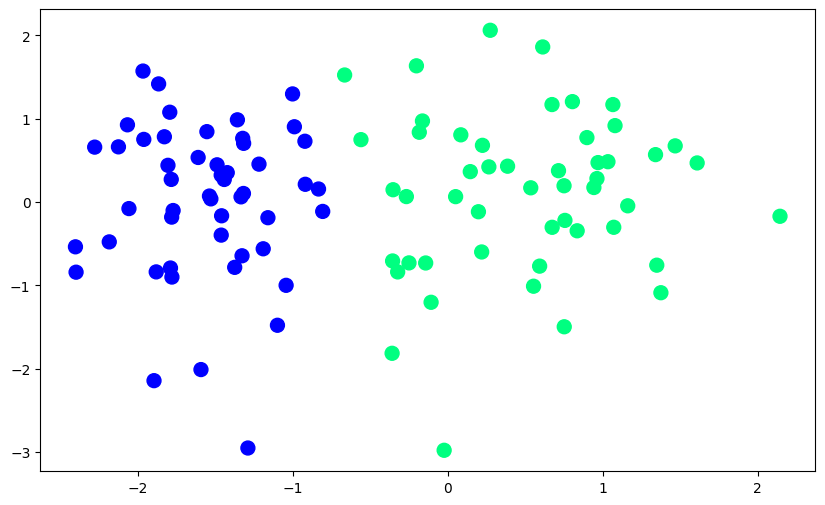

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [10]:
def step(z):
    return 1 if z > 0 else 0

In [11]:
def perceptron(X_train, y_train):
    X_train = np.insert(X_train, 0, 1, axis=1)
    weights = np.ones(X_train.shape[1])

    epochs=  1000
    lr = 0.01
    for i in range(epochs):
        # choose random point
        j = np.random.randint(0, X_train.shape[0])
        y_pred = step(X_train[j] @ weights)
        # remember + 
        weights = weights + lr * (y_train[j] - y_pred) *  X_train[j]
    return weights[0], weights[1:]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [13]:
intercept_, coef_ = perceptron(X_train, y_train)

In [17]:
print(coef_, intercept_)

[1.29376398 0.26051897] 0.9199999999999999


In [18]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [20]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

(-3.0, 2.0)

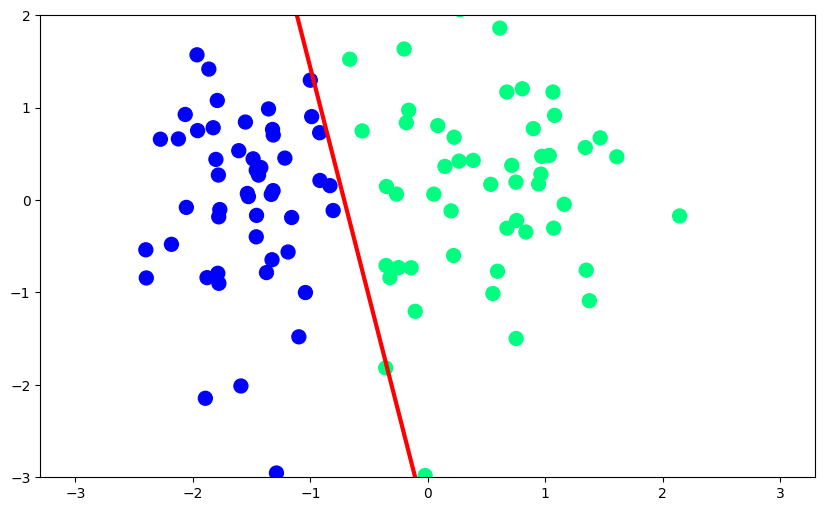

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

In [14]:
preds = X_test @ coef_ + intercept_

In [15]:
from sklearn.metrics import r2_score

In [16]:
r2_score(y_test, preds)

-5.452857772624624

Add sigmoid instead of step function

In [23]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [24]:
def perceptron(X_train, y_train):
    X_train = np.insert(X_train, 0, 1, axis=1)
    weights = np.ones(X_train.shape[1])

    epochs=  1000
    lr = 0.01
    for i in range(epochs):
        # choose random point
        j = np.random.randint(0, X_train.shape[0])
        y_pred = sigmoid(X_train[j] @ weights)
        # remember + 
        weights = weights + lr * (y_train[j] - y_pred) *  X_train[j]
    return weights[0], weights[1:]

In [25]:
intercept_, coef_ = perceptron(X_train, y_train)

In [26]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [27]:
x_input2 = np.linspace(-3, 3, 100)
y_input2 = m * x_input + b

(-3.0, 2.0)

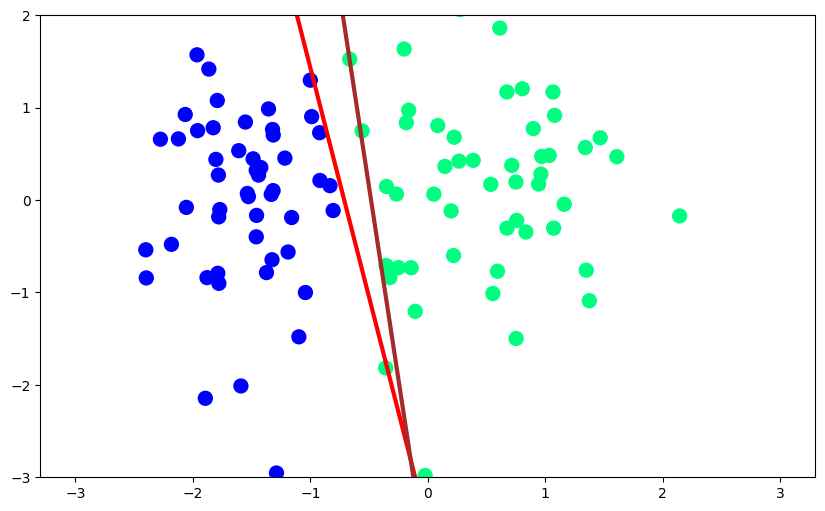

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input2, y_input2, color='brown', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)